In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale

In [2]:
df = pd.read_csv(r"C:\Users\sanket Gawali\Downloads\wine.csv")
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
df.shape

(178, 14)

In [4]:
df1 = df.iloc[:,1:]
df1.head()
# Converting into numpy array
df2 = df1.values
df2

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [5]:
# Normalizing the numerical data
df2_normal = scale(df2)

In [6]:
df2_normal

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [7]:
pca = PCA(n_components=13)
df3_pca = pca.fit_transform(df2_normal)

In [8]:
# The amount of variance that each PCA explains is
var = pca.explained_variance_ratio_
var

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

In [9]:
# Cumulative variance
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([ 36.2 ,  55.41,  66.53,  73.6 ,  80.16,  85.1 ,  89.34,  92.02,
        94.24,  96.17,  97.91,  99.21, 100.01])

In [10]:
pca.components_

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283],
       [-0.20738262,  0.08901289,  0.6262239 ,  0.61208035,  0.13075693,
         0.14617896,  0.1506819 ,  0.17036816,  0.14945431, -0.13730621,
         0.08522192,  0.16600459, -0.12674592],
       [-0.0178563 ,  0.53689028, -0.21417556,  0.06085941, -0.35179658,
         0.19806835,  0.15229479, -0.20330102,  0.39905653,  0.06592568,
        -0.42777141,  0.18412074, -0.23207086],
       [-0.26566365,  0.03521363, -0.14302547,  0.06610294,  0.72704851,
        -0.14931841, -0.10902584, -0.50070298,  0.13685982, -0.07643678,
        -0.17361452, -0.10116099, -0.1578688 ],
       [-0.21353865, -0.536813

In [11]:
df3_pca[:,0:3]

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01],
       [ 3.75706561e+00, -2.75637191e+00, -1.76191842e-01],
       [ 1.00890849e+00, -8.69830821e-01,  2.02668822e+00],
       [ 3.05025392e+00, -2.12240111e+00, -6.29395827e-01],
       [ 2.44908967e+00, -1.17485013e+00, -9.77094891e-01],
       [ 2.05943687e+00, -1.60896307e+00,  1.46281883e-01],
       [ 2.51087430e+00, -9.18070957e-01, -1.77096903e+00],
       [ 2.75362819e+00, -7.89437674e-01, -9.84247490e-01],
       [ 3.47973668e+00, -1.30233324e+00, -4.22735217e-01],
       [ 1.75475290e+00, -6.11977229e-01, -1.19087832e+00],
       [ 2.11346234e+00, -6.75706339e-01, -8.65086426e-01],
       [ 3.45815682e+00, -1.13062988e+00, -1.20427635e+00],
       [ 4.31278391e+00, -2.09597558e+00, -1.26391275e+00],
       [ 2.30518820e+00, -1.66255173e+00,  2.17902616e-01],
       [ 2.17195527e+00, -2.32730534e+00

In [12]:
x = df3_pca[:,0]
y = df3_pca[:,1]
z = df3_pca[:,2]

In [13]:
finalDF = pd.concat([pd.DataFrame(df3_pca[:,0:3],columns=['pc1','pc2','pc3']),df['Type']], axis=1)

In [14]:
finalDF

,pc1,pc2,pc3,Type
0,3.316751,-1.443463,-0.165739,1
1,2.209465,0.333393,-2.026457,1
2,2.516740,-1.031151,0.982819,1
3,3.757066,-2.756372,-0.176192,1
4,1.008908,-0.869831,2.026688,1
...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,3
174,-2.601956,-1.757229,0.207581,3
175,-2.677839,-2.760899,-0.940942,3
176,-2.387017,-2.297347,-0.550696,3


<AxesSubplot:xlabel='pc1', ylabel='pc2'>

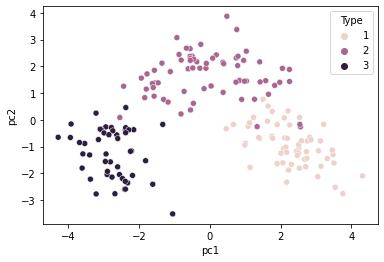

In [15]:
import seaborn as sns
sns.scatterplot(data=finalDF, x='pc1',y='pc2',hue='Type')

In [16]:
df4 = finalDF.drop('Type', axis=1) 
df4

,pc1,pc2,pc3
0,3.316751,-1.443463,-0.165739
1,2.209465,0.333393,-2.026457
2,2.516740,-1.031151,0.982819
3,3.757066,-2.756372,-0.176192
4,1.008908,-0.869831,2.026688
...,...,...,...
173,-3.370524,-2.216289,-0.342570
174,-2.601956,-1.757229,0.207581
175,-2.677839,-2.760899,-0.940942
176,-2.387017,-2.297347,-0.550696


## Hierarchical clustering with PCA

In [17]:
# Normalizing dataset
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df4_normal = scaler.fit_transform(df4)
print(df4_normal)

[[0.88409355 0.28044707 0.44502757]
 [0.75524083 0.52098937 0.25765258]
 [0.79099786 0.33626383 0.56068773]
 [0.93533214 0.10271162 0.44397497]
 [0.6155344  0.35810263 0.66580576]
 [0.85308182 0.18853559 0.39833717]
 [0.7831255  0.31681056 0.36332375]
 [0.73778236 0.25804241 0.47644818]
 [0.79031526 0.35157211 0.28338035]
 [0.81856406 0.36898588 0.36260348]
 [0.9030599  0.2995525  0.41914796]
 [0.70232687 0.39300963 0.34179568]
 [0.7440692  0.38438229 0.37460304]
 [0.9005487  0.32279689 0.3404465 ]
 [1.         0.19211296 0.33444109]
 [0.76637997 0.25078783 0.48366041]
 [0.75087591 0.16079663 0.54547303]
 [0.71910927 0.25500921 0.54176564]
 [0.91030363 0.13493476 0.4128317 ]
 [0.74070149 0.33220437 0.4451275 ]
 [0.86171036 0.36932981 0.42497329]
 [0.62457173 0.44313012 0.55606991]
 [0.7931488  0.48828916 0.43030582]
 [0.68955378 0.54574762 0.47620682]
 [0.70312085 0.51879034 0.55136962]
 [0.61334326 0.34851312 0.84648431]
 [0.7047153  0.38296507 0.45298678]
 [0.64189357 0.48801387 0.32

In [18]:
# Creating clusters
from sklearn.cluster import AgglomerativeClustering
H_clusters = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
H_clusters

AgglomerativeClustering(n_clusters=3)

In [19]:
y_H=pd.DataFrame(H_clusters.fit_predict(df4_normal),columns=['clusterid_H'])
y_H['clusterid_H'].value_counts()

0    66
2    65
1    47
Name: clusterid_H, dtype: int64

## KMeans with PCA

In [20]:
from sklearn.cluster import KMeans

C:\Users\sanket Gawali\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


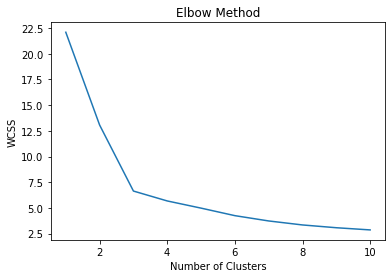

In [21]:
wcss = []
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(df4_normal)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [22]:
# Building Cluster algorithm
KM_Clusters = KMeans(3, random_state=42)
KM_Clusters.fit(df4_normal)

KMeans(n_clusters=3, random_state=42)

In [23]:
y_KM=pd.DataFrame(KM_Clusters.fit_predict(df4_normal),columns=['clusterid_KM'])
y_KM['clusterid_KM'].value_counts()

0    68
2    61
1    49
Name: clusterid_KM, dtype: int64

## Actual VS Predicted Clustering data

In [24]:
wine_class = df['Type']
wine_class = pd.Series(wine_class)

In [25]:
clusterid_H = H_clusters.labels_
clusterid_H = pd.Series(clusterid_H)

In [26]:
clusterid_KM = KM_Clusters.labels_
clusterid_KM = pd.Series(clusterid_KM)

In [27]:
pred_df = pd.concat([wine_class,clusterid_H,clusterid_KM], axis=1)
pred_df

,Type,0,1
0,1,0,2
1,1,0,2
2,1,0,2
3,1,0,2
4,1,0,2
...,...,...,...
173,3,1,1
174,3,1,1
175,3,1,1
176,3,1,1
